# MESSAGE SPAM CLASSIFIER

### THIS NOTEBOOK ANALYZISES THE SPAM CLASSIFIER DATASET AND CLASSIFIES THE SPAM AND HAM MESSAGES USING VARIOUS MACHINE LEARNING ALGORITHMS.

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#READING THE CSV FILE
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
#DISPLAYING THE FIRST 5 ROWS OF THE DATASET
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#DATA CLEANING
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['Label', 'SMS']
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Label'] = df['Label'].map({'ham':0, 'spam':1})
df = df[['SMS', 'Label']]
df.head()

,SMS,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


DATA VISUALIZATION

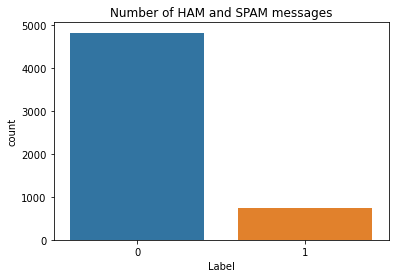

In [6]:
sns.countplot(df['Label'])
plt.xlabel('Label')
plt.title('Number of HAM and SPAM messages')
plt.show()

WORD CLOUDS

In [9]:
from wordcloud import WordCloud,STOPWORDS
spam_msg=df[df['Label'] == 1]
spam_words=' '.join(spam_msg['SMS'])
spam_msg

ham_msg=df[df['Label'] == 0]
ham_words=' '.join(ham_msg['SMS'])
ham_msg

,SMS,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
6,Even my brother is not like to speak with me. ...,0
...,...,...
5565,Huh y lei...,0
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


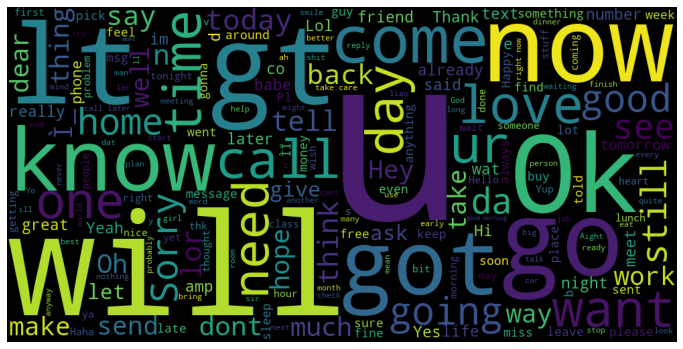

In [10]:
#HAM WORD CLOUD
ham_cloud=WordCloud(width=1000,height=500).generate(ham_words)
plt.figure(figsize=(12,12))
plt.imshow(ham_cloud)
plt.axis('off')
plt.show()

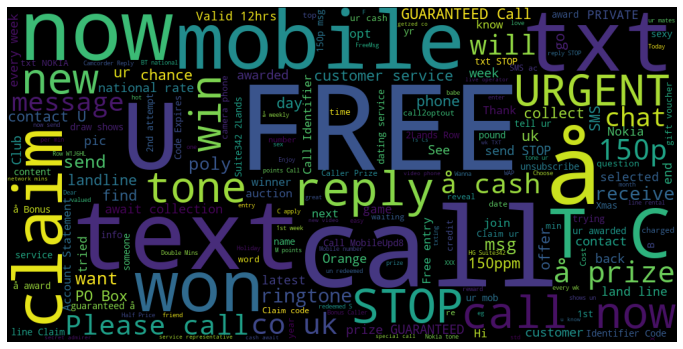

In [11]:
#SPAM WORD CLOUD
spam_cloud=WordCloud(width=1000,height=500).generate(spam_words)
plt.figure(figsize=(12,12))
plt.imshow(spam_cloud)
plt.axis('off')
plt.show()

In [13]:
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    reviews=re.sub('[^a-zA-Z]',' ',df['SMS'][i])
    reviews=reviews.lower()
    reviews=reviews.split()
    reviews=[ps.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews=' '.join(reviews)
    corpus.append(reviews)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swtsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


MODELS

In [14]:
#ASSIGNING FEATURES AND TARGET VARIABLE
X = df['SMS'].values
y = df['Label'].values

In [15]:
#SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

NAIVE BAYES

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

cv = CountVectorizer(max_features=3700)

X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[945   4]
 [ 13 153]]
0.9847533632286996
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.97      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)

In [20]:
cm_dtc=confusion_matrix(y_test,dtc_pred)
cm_dtc

array([[936,  13],
       [ 27, 139]], dtype=int64)

In [21]:
acc_dtc=accuracy_score(y_test,dtc_pred)
acc_dtc

0.9641255605381166

In [22]:
print(classification_report(y_test,dtc_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       949
           1       0.91      0.84      0.87       166

    accuracy                           0.96      1115
   macro avg       0.94      0.91      0.93      1115
weighted avg       0.96      0.96      0.96      1115



In [23]:
#COMPARING THE TWO CLASSIFICATION REPORTS
print(classification_report(y_test, y_pred))
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.97      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       949
           1       0.91      0.84      0.87       166

    accuracy                           0.96      1115
   macro avg       0.94      0.91      0.93      1115
weighted avg       0.96      0.96      0.96      1115

